In [283]:
import networkx as nx
import operator
import random

In [284]:
k = int(input())                                                                                        #input the value of k
#G=nx.karate_club_graph()                                                                               #to test known dataset
G=nx.Graph()                                                                                            #initialization of graph G
G=nx.read_edgelist("E:/Papan(F)/Books/Thesis materials/Algo_python_simulation/2.txt", nodetype = int)   #input graph from a file 
print(nx.is_connected(G))                                                                               #dataset checking
print(nx.is_directed(G))                                                                                #dataset checking
#print(k)

 2


True
False


In [285]:
E=[e for e in G.edges]                                                              #not necessary, only used it to debug
E

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 5),
 (0, 6),
 (0, 8),
 (1, 5),
 (2, 4),
 (2, 5),
 (3, 4),
 (3, 5),
 (3, 7),
 (3, 8),
 (5, 8),
 (6, 4),
 (6, 7),
 (8, 7),
 (4, 7)]

In [286]:
n=nx.number_of_nodes(G)
print(n)
G2=nx.complete_graph(n)                                                           #conversion to complete graph

9


In [287]:
E_h=[e for e in G2.edges]                                                         #not necessary, only used to debug

In [288]:
E_c=[e for e in nx.non_edges(G)]                                                  #edges in complement graph of G
print(len(E_c))
E_c

18


[(0, 4),
 (0, 7),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 6),
 (1, 7),
 (1, 8),
 (2, 8),
 (2, 3),
 (2, 6),
 (2, 7),
 (3, 6),
 (4, 8),
 (4, 5),
 (5, 6),
 (5, 7),
 (6, 8)]

In [289]:
#label_init=[v*k+1 for v in G.nodes]
label_init={vertex:vertex*k+1  for vertex in G.nodes}                            #labeling the complete graph using a dictionary
#label_init[33] = 10
print(label_init)
#max_labeled=max(label_init)
max_label=max(label_init.values())                                               #finding the maximum labeled vertex
for vertex, label in label_init.items():                                         #finding the maximum label
    if label == max_label:
        max_labeled=vertex
        break
#max_labeled = max(enumerate(label_init.values()), key=operator.itemgetter(1))[0] 
#max_label = max(enumerate(label_init.values()), key=operator.itemgetter(1))[1]   
print(max_labeled)
print(max_label)

{0: 1, 1: 3, 2: 5, 3: 7, 5: 11, 6: 13, 8: 17, 4: 9, 7: 15}
8
17


In [290]:
def violate_constraints(G_now, label_now, k, vertex, label_this):                                       #this function checks if a label violates the constraints of k-safe labeling
    for node in nx.all_neighbors(G_now, vertex):
        if label_this in label_now.values() or (label_now[node] > 0 and ((label_this-label_now[node] < k and label_this-label_now[node] > 0) or (label_now[node]-label_this < k and label_now[node]-label_this >0))):
            return True

In [291]:
edge_stack = []                                                                   #stack where removed edges are pushed

while not len(E_c)==0:                                                            #first outer loop, label_init is the dictionary of the previous step
    label_p=label_init                                                            #not necessary
    nodes_reversed=[w for w in sorted(label_p, key=label_init.get, reverse=True)] #sorting the vertices in decreasing order of labels
    for node in nodes_reversed:                                                   #taking any random edge incident to the first maximum labeled vertex
        if not len([e for e in E_c if e[0]==node or e[1]==node])==0:              #which has an incident edge in E_c
            e_incident=random.choice([e for e in E_c if e[0]==node or e[1]==node])
            break
    
    print(e_incident)
    edge_stack.append(e_incident)                                                 #adding the edge to the stack
    #print(len(E_c))
    E_c.remove(e_incident)                                                        #removing the edge from E_c
    print(len(E_c))
    #print(len(E_h))
    print(edge_stack)
    #E_cc

    if G2.has_edge(e_incident[0], e_incident[1]):
        G2.remove_edge(e_incident[0], e_incident[1])                              #removing the edge from G2
    else:
        G2.remove_edge(e_incident[1], e_incident[0])
        
    #print(list(nx.non_edges(G2)))
    label_now={vertex:0  for vertex in nodes_reversed}                            #initializing the dictionary of current step with labels 0
    #label_now[e_incident[0]]=1
    #label_now[e_incident[1]]=2
    for e in edge_stack[::-1]:                                                    #inner loop 1, taking edges in the reverse order of input to stack
        if label_now[e[0]]==0 and label_now[e[1]]==0:
            for label in range(1,max_label):                                      #because a vertex can be labeled with at most the max_label of the previous step
                if not violate_constraints(G2, label_now, k, e[0], label) and not violate_constraints(G2, label_now, k, e[1], label+1):  #if both vertices incident to the edges are unlabeled, then label both with consecutive integers
                    label_now[e[0]]=label
                    label_now[e[1]]=label+1
                    break
        elif label_now[e[0]]==0 and not label_now[e[1]]==0:                       #if only one vertex is unlabeled, label that one
            for label in range(1,max_label+1):  
                if not violate_constraints(G2, label_now, k, e[0], label):
                    label_now[e[0]]=label
                    break
        elif label_now[e[1]]==0 and not label_now[e[0]]==0:                       #if only one vertex is unlabeled, label that one
            for label in range(1,max_label+1):  
                if not violate_constraints(G2, label_now, k, e[1], label):
                    label_now[e[1]]=label
                    break

    for node in nodes_reversed:                                                   #inner loop 2, label the unlabeled vertices in the reverse order of labels in previous step
        if label_now[node]==0:
            for label in range(3,max_label+1):
                if not violate_constraints(G2, label_now, k, node, label):        #------this for loop can be made efficient------#
                    label_now[node]=label
                    break
    
    flag=0                                                                        #to check if the current span is bigger than the previous span
    for vertex, label in label_now.items():
        if label == 0:                                                            #if one vertex is labeled as 0, that means a label more than the previous span should have been needed
            flag=1
            break
    
    if flag==0:                                                                   #flag=0 means the current span is not greater thab the previous span
        label_init=label_now                                                      #replace the previous step's dictionary with current step's dictionary
        
    max_label=max(label_init.values())                                            #finding the maximum label in this step
    for vertex, label in label_init.items():                                      #finding the maximum labeled vertex in this step
        if label == max_label:
            max_labeled=vertex
            break
    
    print(label_init)
    print(max_labeled)                                                            #printing for debugging and testing purposes
    print(max_label)
    print()

(6, 8)
17
[(6, 8)]
{8: 2, 7: 4, 6: 1, 5: 6, 4: 8, 3: 10, 2: 12, 1: 14, 0: 16}
0
16

(0, 4)
16
[(6, 8), (0, 4)]
{0: 1, 1: 7, 2: 9, 3: 11, 4: 2, 5: 13, 7: 15, 8: 5, 6: 4}
7
15

(0, 7)
15
[(6, 8), (0, 4), (0, 7)]
{7: 2, 5: 9, 3: 11, 2: 13, 1: 15, 8: 7, 6: 6, 4: 4, 0: 1}
1
15

(1, 6)
14
[(6, 8), (0, 4), (0, 7), (1, 6)]
{1: 1, 2: 11, 3: 13, 5: 15, 8: 9, 6: 2, 4: 7, 7: 5, 0: 4}
5
15

(5, 7)
13
[(6, 8), (0, 4), (0, 7), (1, 6), (5, 7)]
{5: 1, 3: 12, 2: 14, 8: 10, 4: 8, 7: 2, 0: 7, 6: 5, 1: 4}
2
14

(2, 8)
12
[(6, 8), (0, 4), (0, 7), (1, 6), (5, 7), (2, 8)]
{2: 1, 3: 13, 8: 2, 4: 11, 0: 10, 6: 8, 1: 7, 7: 5, 5: 4}
3
13

(3, 6)
11
[(6, 8), (0, 4), (0, 7), (1, 6), (5, 7), (2, 8), (3, 6)]
{3: 1, 4: 13, 0: 12, 6: 2, 1: 10, 7: 8, 5: 7, 8: 5, 2: 4}
4
13

(4, 5)
10
[(6, 8), (0, 4), (0, 7), (1, 6), (5, 7), (2, 8), (3, 6), (4, 5)]
{3: 1, 4: 13, 0: 12, 6: 2, 1: 10, 7: 8, 5: 7, 8: 5, 2: 4}
4
13

(1, 4)
9
[(6, 8), (0, 4), (0, 7), (1, 6), (5, 7), (2, 8), (3, 6), (4, 5), (1, 4)]
{4: 2, 0: 12, 1: 1, 7: 11, 5:

NameError: name 'plt' is not defined

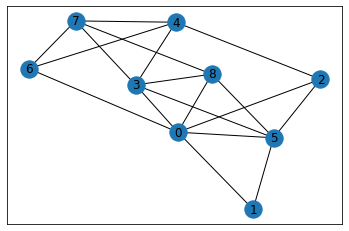

In [296]:
nx.draw_networkx(G, with_labels=True)                                      #drawing the graph for debugging purposes
plt.show()